#Classification
#Use the kidney disease data for classification  model 


Implement :

1) Preprocessing

2) Model to implement:- linear, KNN-classifier  DT classifier, RF-classifier

3) Hyperparameter tuning

4) find the errors and accuracy of the data

#Dhanashri Shabade

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random
import os
from sklearn import metrics

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kidney_disease.csv')

In [5]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

## CKd -Have kidnay Disease
##notckd - Don't have Kidney Disease

In [7]:
df.describe(include='all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
390,390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,52,6300,5.3,no,no,no,good,no,no,notckd
391,391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44,5800,6.3,no,no,no,good,no,no,notckd
392,392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,46,6600,5.5,no,no,no,good,no,no,notckd
393,393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7400,5.4,no,no,no,good,no,no,notckd
394,394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,45,9500,4.6,no,no,no,good,no,no,notckd
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


# Data preprocessing

In [9]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [10]:
df.shape

(400, 26)

In [11]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# we can observe bit high number of null values in this data

# Handling Missing values

In [12]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

###Dropping null values for columns having very few null values

In [13]:
df.dropna(subset=['age','pc', 'pcc','htn', 'dm', 'cad','appet', 'pe', 'ane',])

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [14]:
df.ffill(axis = 0,inplace=True)

In [15]:
df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               2
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               3
pot               3
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [18]:
used_features = ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']

In [19]:
x = df[used_features]
y = df['classification']

In [20]:
x

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35,7300,4.6,no,no,no,good,no,no
5,5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,...,12.2,39,7800,4.4,yes,yes,no,good,yes,no
6,6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,...,12.4,36,7800,4.4,no,no,no,good,no,no
7,7,24.0,70.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,12.4,44,6900,5,no,yes,no,good,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,15.7,47,6700,4.9,no,no,no,good,no,no
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,16.5,54,7800,6.2,no,no,no,good,no,no
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,15.8,49,6600,5.4,no,no,no,good,no,no
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,14.2,51,7200,5.9,no,no,no,good,no,no


In [21]:
X = pd.get_dummies(x)


In [22]:
y

3         ckd
4         ckd
5         ckd
6         ckd
7         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 397, dtype: object

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [24]:
y = label_encoder.fit_transform(y)

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

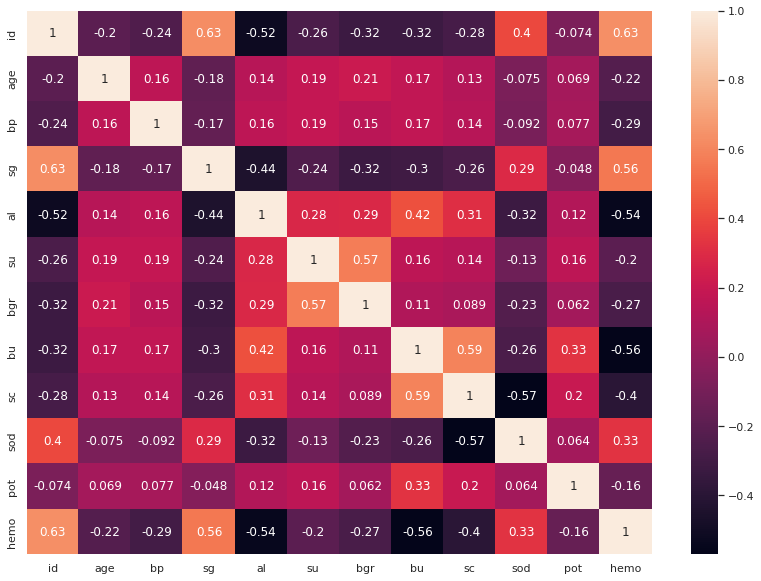

In [26]:
plt.figure(figsize = (14,10))
sns.heatmap(x.corr(),annot = True)

In [27]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


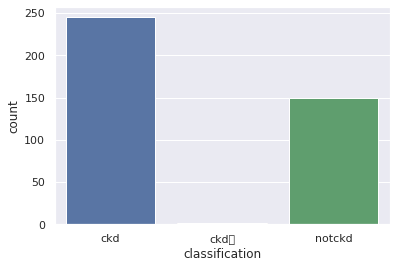

In [28]:
sns.countplot(df['classification'])
plt.show

# scaling of data

In [29]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
x_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# logistic Regression

In [33]:
logreg = LogisticRegression()

In [34]:
penalty = ['l2',None] 

C=np.logspace(0,2,10) 

hyperparameters = dict(C=C,penalty=penalty)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
GridSearchCV??

In [37]:
skf = StratifiedKFold(n_splits=10,shuffle = True)

grid_search = GridSearchCV(estimator=logreg, param_grid=hyperparameters, cv=skf, scoring='accuracy',error_score=0)

In [38]:
model= grid_search.fit(x_scaled,y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solve

In [39]:
model

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             error_score=0, estimator=LogisticRegression(),
             param_grid={'C': array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ]),
                         'penalty': ['l2', None]},
             scoring='accuracy')

In [40]:
model.best_estimator_.get_params()

{'C': 59.94842503189409,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
print("Best: %f using %s" % (model.best_score_, model.best_params_))

Best: 0.984936 using {'C': 59.94842503189409, 'penalty': 'l2'}


In [42]:
lgRg = LogisticRegression(C=1,penalty='l2')

In [43]:
lgRg.fit(x_scaled,y)

LogisticRegression(C=1)

# KNeighborsClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNN = KNeighborsClassifier()

In [46]:
neighbors = [3,4,5] 
metric=['minkowski','euclidean','manhattan']
weights=['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
n_jobs = [1,2]

In [47]:
hyperparameters = dict(n_neighbors=neighbors,metric=metric,weights=weights,algorithm=algorithm,n_jobs=n_jobs)

In [48]:
clf = GridSearchCV(KNN,hyperparameters, cv=skf)

In [49]:
model2 = clf.fit(x_scaled,y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [50]:
print("Best score: %f using %s" % (model2.best_score_, model2.best_params_))

Best score: 0.949744 using {'algorithm': 'auto', 'metric': 'manhattan', 'n_jobs': 1, 'n_neighbors': 4, 'weights': 'uniform'}


In [51]:
KNN = KNeighborsClassifier(algorithm= 'auto', metric='manhattan', n_jobs= 1, n_neighbors=4, weights='uniform')

In [52]:
KNN.fit(x_scaled,y)

KNeighborsClassifier(metric='manhattan', n_jobs=1, n_neighbors=4)

In [72]:
KNN.score(x_scaled,y)

0.9798488664987406

## we can observe here that after tunning the parameters the model accuaracy got increased

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
RFC = RandomForestClassifier()

In [55]:
criterion=["gini", "entropy"]
n_estimator=[30,35,40]
max_depth=[2, 8, 16]
min_samples_split=[2,3,4,5]
max_features=['auto','sqrt','percentage']

In [56]:
hyperparameters = dict(criterion=criterion,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split)

In [57]:
clf = GridSearchCV(RFC,hyperparameters, cv=skf)

In [58]:
model2 = clf.fit(x_scaled,y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "

In [59]:
print("Best: %f using %s" % (model2.best_score_, model2.best_params_))

Best: 0.995000 using {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2}


In [60]:
RFC = RandomForestClassifier(criterion= 'gini',max_depth=2,max_features='auto', min_samples_split=2)

In [61]:
RFC.fit(x_scaled,y)

RandomForestClassifier(max_depth=2)

In [73]:
RFC.score(x_scaled,y)

0.9874055415617129

In [62]:
DTC = DecisionTreeClassifier()

In [63]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]


In [64]:
hyperparameters = dict(criterion=criterion,max_depth=max_depth)

In [65]:
clf = GridSearchCV(DTC,hyperparameters, cv=skf)

In [66]:
model = clf.fit(x_scaled,y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [67]:
print("Best: %f using %s" % (model.best_score_, model.best_params_))

Best: 0.995000 using {'criterion': 'gini', 'max_depth': 2}


In [68]:
DTC = DecisionTreeClassifier(criterion= 'gini', max_depth= 2)

In [69]:
model = DTC.fit(x_scaled,y)

In [75]:
model.score(x_scaled,y)

0.9949622166246851